In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf

In [2]:
sups = pd.read_csv('50_Startups.csv')

In [3]:
sups.head(10)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [4]:
sups.rename(columns = {'R&D Spend': 'DnR', 'Marketing Spend':'MS'}, inplace = True)

In [5]:
sups.head()

,DnR,Administration,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [6]:
sups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   DnR             50 non-null     float64
 1   Administration  50 non-null     float64
 2   MS              50 non-null     float64
 3   State           50 non-null     object 
 4   Profit          50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [7]:
# Check for missing values

sups.isna().sum()

DnR               0
Administration    0
MS                0
State             0
Profit            0
dtype: int64

### Converting the Categorical data into numerical data

In [8]:
# Counting the number of states

state_count = sups.State.value_counts()
state_count

New York      17
California    17
Florida       16
Name: State, dtype: int64

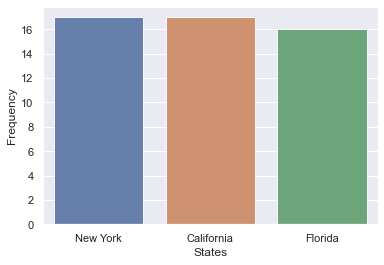

In [9]:
# Visualizing the different Startup locations

sns.set(style="darkgrid")
sns.barplot(state_count.index, state_count.values, alpha=0.9)
plt.xlabel('States')
plt.ylabel('Frequency')
plt.show()

Location of Startups are very balanced

In [10]:
#Changes does not effect the "sups" dataframe

df = sups.copy()

In [11]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df.iloc[: , -2] = labelencoder.fit_transform(df.iloc[: , -2])
df

,DnR,Administration,MS,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94
5,131876.90,99814.71,362861.36,2,156991.12
6,134615.46,147198.87,127716.82,0,156122.51
7,130298.13,145530.06,323876.68,1,155752.60
8,120542.52,148718.95,311613.29,2,152211.77
9,123334.88,108679.17,304981.62,0,149759.96


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   DnR             50 non-null     float64
 1   Administration  50 non-null     float64
 2   MS              50 non-null     float64
 3   State           50 non-null     int32  
 4   Profit          50 non-null     float64
dtypes: float64(4), int32(1)
memory usage: 1.9 KB


In [13]:
df.describe()

,DnR,Administration,MS,State,Profit
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,1.000000,112012.639200
std,45902.256482,28017.802755,122290.310726,0.832993,40306.180338
min,0.000000,51283.140000,0.000000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,0.000000,90138.902500
50%,73051.080000,122699.795000,212716.240000,1.000000,107978.190000
75%,101602.800000,144842.180000,299469.085000,2.000000,139765.977500
max,165349.200000,182645.560000,471784.100000,2.000000,192261.830000


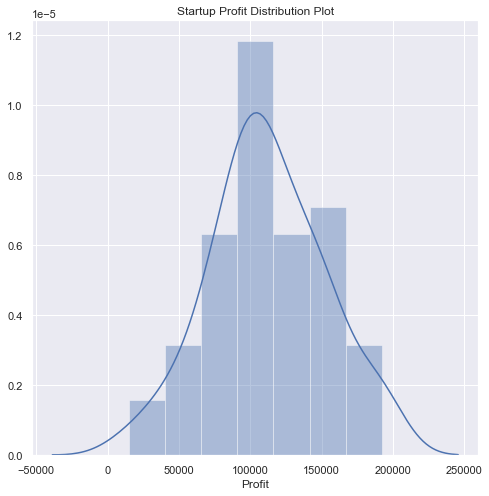

In [14]:
plt.figure(figsize=(8,8))
plt.title('Startup Profit Distribution Plot')
sns.distplot(df['Profit'])

### Correlation Matrix

In [15]:
df.corr()

,DnR,Administration,MS,State,Profit
DnR,1.000000,0.241955,0.724248,0.104685,0.972900
Administration,0.241955,1.000000,-0.032154,0.011847,0.200717
MS,0.724248,-0.032154,1.000000,0.077670,0.747766
State,0.104685,0.011847,0.077670,1.000000,0.101796
Profit,0.972900,0.200717,0.747766,0.101796,1.000000


As expected, the more you invest in Research & Development, greater your Profit

The marketing spend seems to be proportional with the profit. The reason could be that the more clients knowing the product (or service) of the startup, greater the revenue.

The administration spend seems to have no relation with the profit.

### Scatter Plot between variables along with Histogram

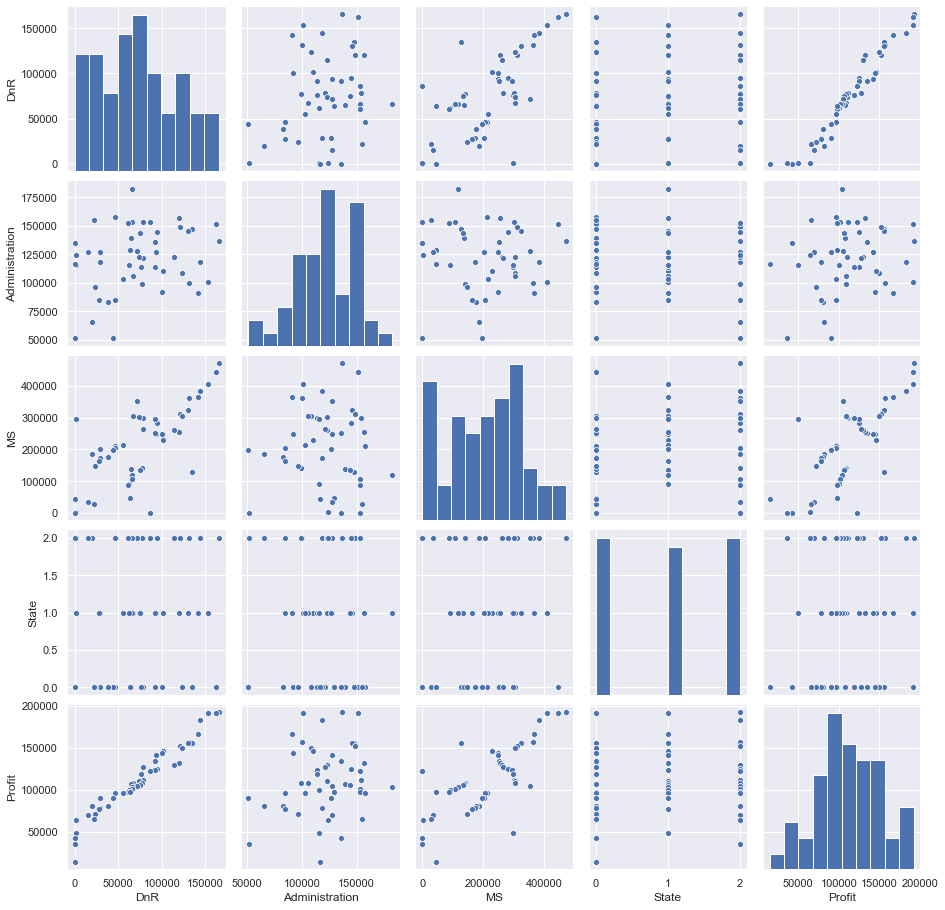

In [16]:
sns.set_style(style = 'darkgrid')
sns.pairplot(df)

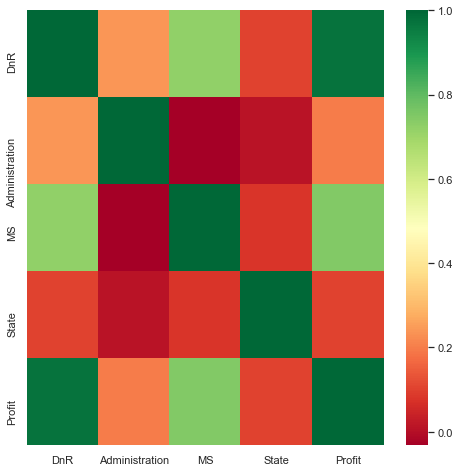

In [17]:
plt.figure(figsize = (8, 8))
sns.heatmap(df.corr(), cmap="RdYlGn")
plt.show()

(50, 5)

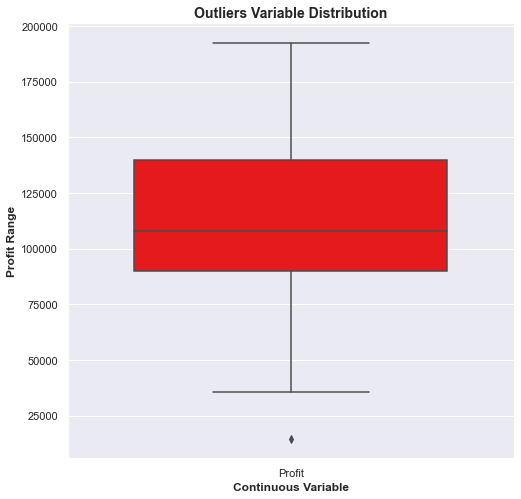

In [18]:
outliers = ['Profit']
plt.rcParams['figure.figsize'] = [8,8]
sns.boxplot(data=df[outliers], orient="v", palette="Set1" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Profit Range", fontweight = 'bold')
plt.xlabel("Continuous Variable", fontweight = 'bold')
df.shape

It is noticed that there is an outlier in the profit. However, it won't be removed in sake of the amount of data that is few (just 50 entries)

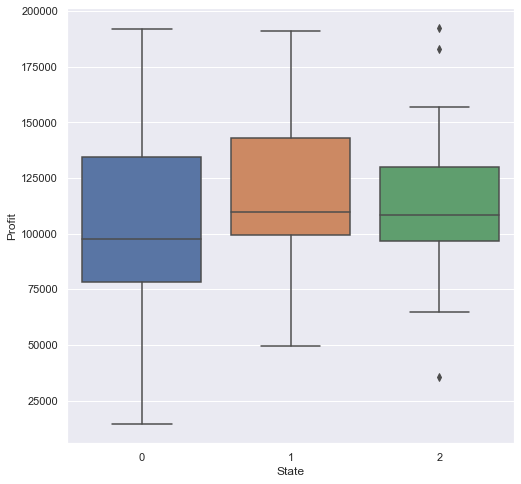

In [19]:
plt.figure(figsize=(8, 8))
sns.boxplot(x = 'State', y = 'Profit', data = df)
plt.show()

All outliers presented are in the state of New York.


The startups located in the state of California have a greater range between the minimum and the maximum profit

### Preparing a model

In [20]:
# Bulid a model

import statsmodels.formula.api as smf
model = smf.ols(formula = "Profit ~ DnR + Administration + MS + State", data=df).fit()

In [21]:
# Co-efficients
model.params

Intercept         50142.506443
DnR                   0.805760
Administration       -0.026826
MS                    0.027228
State               -22.320577
dtype: float64

In [22]:
# t-value & p-value
# If p-value is < 0.05 then the variable is significant i.e. useful for us to predict profit
    # If the p-value is not significant run a simple linear reg model and then check the p-values 
print(model.tvalues, '\n',  model.pvalues)

Intercept          7.368962
DnR               17.608621
Administration    -0.519906
MS                 1.636966
State             -0.013865
dtype: float64 
 Intercept         2.900008e-09
DnR               8.249206e-22
Administration    6.056771e-01
MS                1.086131e-01
State             9.889988e-01
dtype: float64


In [23]:
# R-squared values gives the accuracy of regression equation
(model.rsquared,model.rsquared_adj) 

(0.9507462044842656, 0.9463680893273114)

### Residual Analysis
Test of Normality of Residuals (Q-Q plot)

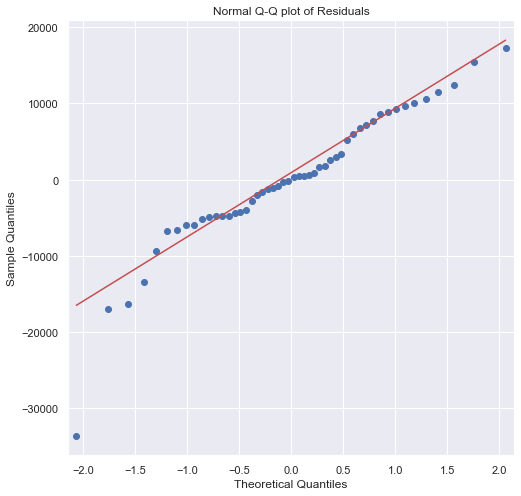

In [24]:
import statsmodels.api as sm
qqplot = sm.qqplot(model.resid, line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of Residuals")
plt.show()

In [25]:
list(np.where(model.resid>10000))

[array([10, 12, 16, 36, 38, 45], dtype=int64)]

### Residual vs Regression

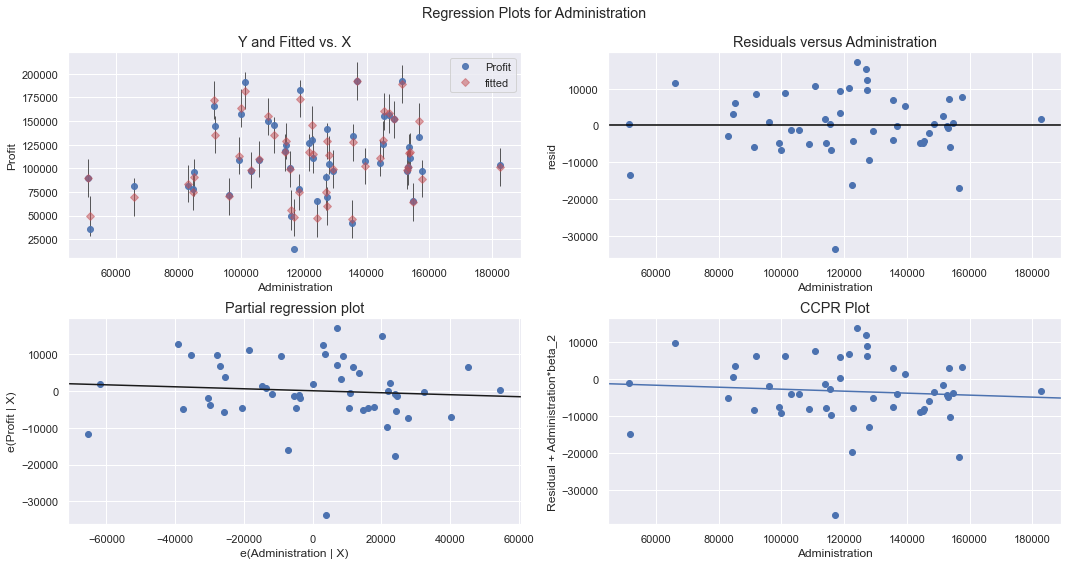

In [26]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'Administration', fig=fig)
plt.show()

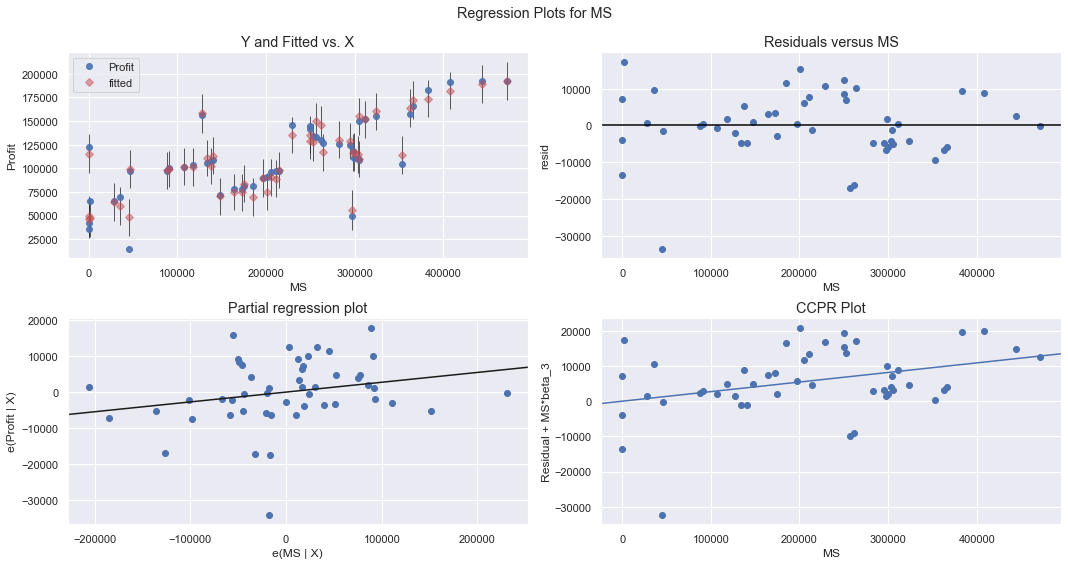

In [27]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'MS', fig=fig)
plt.show()

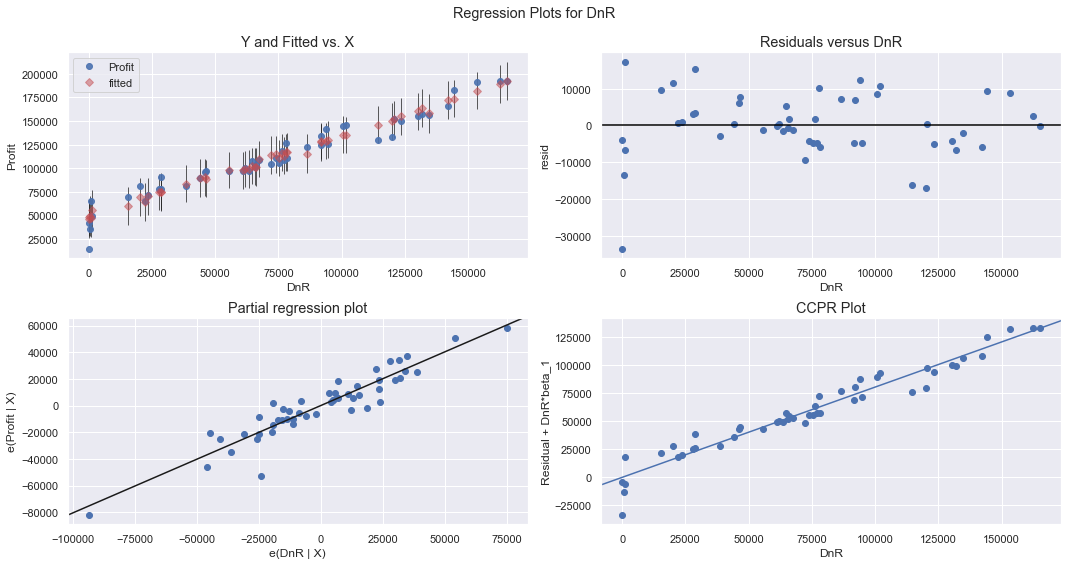

In [28]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'DnR', fig=fig)
plt.show()

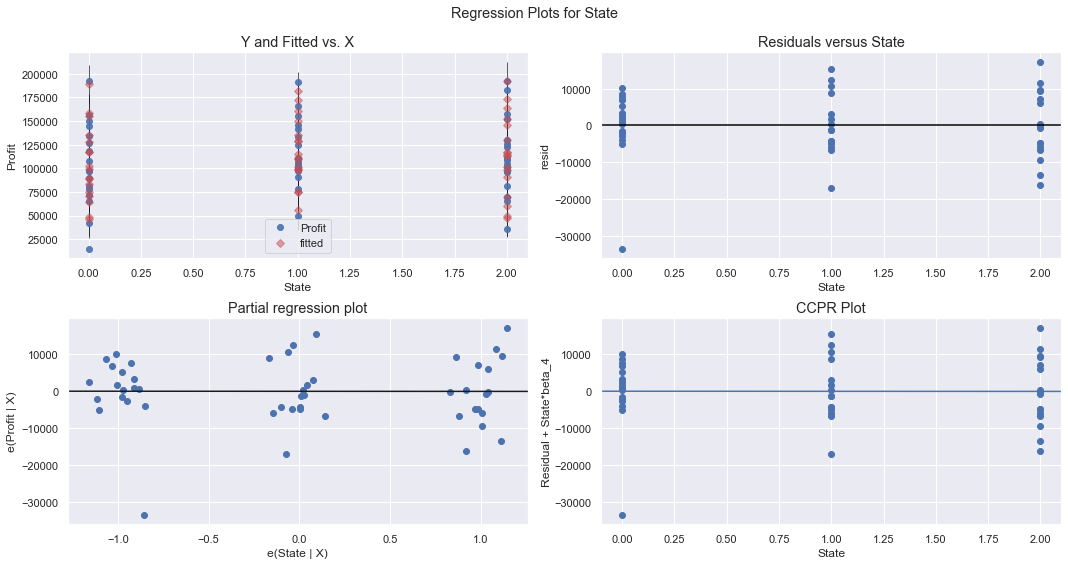

In [29]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'State', fig=fig)
plt.show()

### Calculating VIF
should be <20

In [30]:
rsq_dr = smf.ols('DnR~Administration+MS+State',data=df).fit().rsquared  
vif_dr = 1/(1-rsq_dr) 

rsq_admin = smf.ols('Administration~DnR+MS+State',data=df).fit().rsquared  
vif_admin = 1/(1-rsq_admin)

rsq_ms = smf.ols('MS~Administration+DnR+State',data=df).fit().rsquared  
vif_ms = 1/(1-rsq_ms) 

rsq_s = smf.ols('State~Administration+DnR+MS',data=df).fit().rsquared  
vif_s = 1/(1-rsq_s) 

# Storing vif values in a data frame
d1 = {'Variables':['DnR','Administration','MS','State'],'VIF':[vif_dr,vif_admin,vif_ms,vif_s]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,DnR,2.481178
1,Administration,1.175315
2,MS,2.326780
3,State,1.011281


### Model Detection Diagnostics
#### Detecting influencers/Outliners
#### Cook's Distance

In [31]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

<ipython-input-32-4fe9d98a9529>:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(df)), np.round(c, 3))


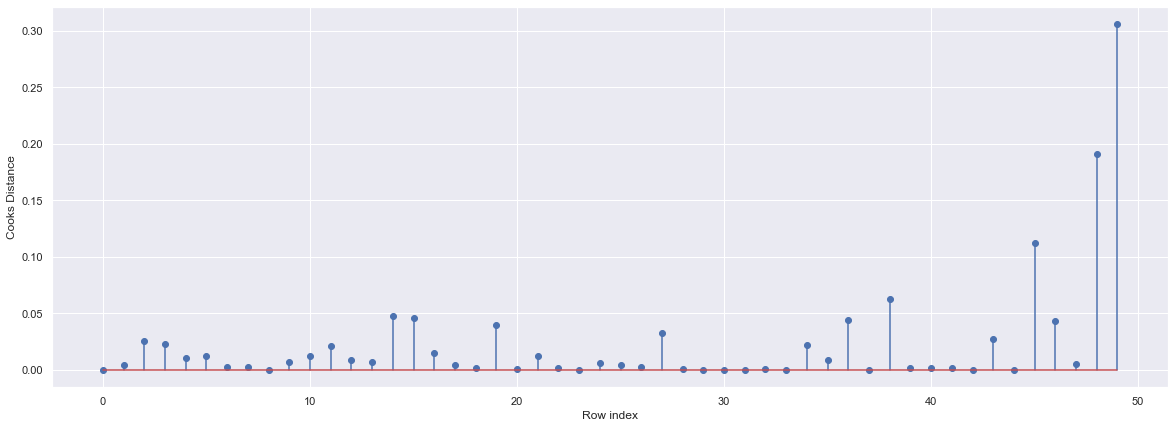

In [32]:
# Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(df)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [33]:
# index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(49, 0.3060281954699332)

### High Influence Points

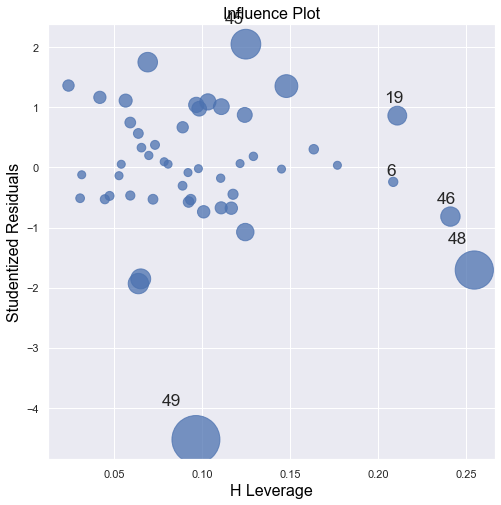

In [34]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [35]:
k = df.shape[1]
n = df.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.36

In [36]:
df[df.index.isin([48 , 49])]

,DnR,Administration,MS,State,Profit
48,542.05,51743.15,0.00,2,35673.41
49,0.00,116983.80,45173.06,0,14681.40


In [37]:
df.head(10)

,DnR,Administration,MS,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94
5,131876.90,99814.71,362861.36,2,156991.12
6,134615.46,147198.87,127716.82,0,156122.51
7,130298.13,145530.06,323876.68,1,155752.60
8,120542.52,148718.95,311613.29,2,152211.77
9,123334.88,108679.17,304981.62,0,149759.96


In [39]:
df.shape

(50, 5)

### Improving the model

In [40]:
df_new = df

In [41]:
# Discard the points that are influencers and reassign the row number (reset_index())
startups1 = df_new.drop(df_new.index[[48,49]],axis = 0).reset_index()

In [42]:
# Drop the original index
startups1 = startups1.drop(['index'],axis = 1)

In [43]:
startups1.head()

,DnR,Administration,MS,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [44]:
startups1.shape

(48, 5)

In [45]:
# Check the Accuracy of model

finalmodel = smf.ols('Profit~DnR+Administration+MS+State', data=startups1).fit()

In [46]:
(finalmodel.rsquared,finalmodel.aic)

(0.9627292717607983, 996.6012791256659)

### Predicting for New data

In [50]:
new_data = pd.DataFrame({'DnR':200000, 'Administration':9000, 'MS':150000, 'State':2}, index=[1])

In [51]:
finalmodel.predict(new_data)

1    218575.82133
dtype: float64

In [52]:
finalmodel.predict(startups1.iloc[0:5,])

0    188691.663530
1    185790.357535
2    180761.889557
3    171753.791062
4    171708.114064
dtype: float64

In [55]:
pred_y = finalmodel.predict(startups1)
pred_y

0     188691.663530
1     185790.357535
2     180761.889557
3     171753.791062
4     171708.114064
5     162717.763405
6     158559.692036
7     158272.223695
8     149831.701814
9     155082.931380
10    136424.223066
11    137298.242571
12    129372.671089
13    127757.998367
14    148255.711836
15    145861.378816
16    117785.682202
17    129119.646686
18    129293.693104
19    117267.454225
20    117465.065644
21    116019.622202
22    114875.417079
23    110862.030119
24    115652.834437
25    103964.340304
26    111706.919945
27    113590.607882
28    101698.661089
29    102684.958141
30    102226.363396
31     98853.225539
32    102052.449581
33     99985.392712
34     89665.884676
35     93142.748488
36     77062.371770
37     94228.717421
38     73627.499062
39     87516.520738
40     77510.048275
41     78478.229533
42     74447.533771
43     63499.266821
44     67583.597381
45     51671.175165
46     57802.163395
47     50796.675392
dtype: float64